In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2018_12_95_1_14,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [4]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

In [6]:
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34, 13, 21, 34]

In [46]:
#creating identity matrix
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [51]:
#grouping fuel_data into fuel type code
fuel_type = pd.DataFrame(fuel_data.groupby(['fuel_type_code_pudl']) [['record_id','utility_id_ferc1', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 
            'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']].sum())
fuel_type.reset_index(['fuel_type_code_pudl'],inplace=True)
fuel_type

,fuel_type_code_pudl,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,coal,988354,1.626898e+10,177459.483188,576254.381,9.995814e+05,15275.11517
1,gas,1425666,5.562880e+10,11737.687844,156891.829,1.389252e+05,62126.34574
2,nuclear,87851,4.462058e+09,14382.174064,4053318.428,2.340864e+07,1404.14500
3,oil,913137,5.089737e+08,46887.135739,1361824.819,2.531352e+06,102402.57762
4,other,18448,4.923388e+08,95.649646,3048.394,2.817538e+03,25899.18000
5,waste,68026,5.168139e+07,150.452780,8607.492,8.120156e+03,362815.08200


In [52]:
fuel_type.rename(columns={'fuel_type_code_pudl':'fuel type code'}, inplace=True)
fuel_type.columns

Index(['fuel type code', 'utility_id_ferc1', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [53]:
fuel_type

,fuel type code,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,coal,988354,1.626898e+10,177459.483188,576254.381,9.995814e+05,15275.11517
1,gas,1425666,5.562880e+10,11737.687844,156891.829,1.389252e+05,62126.34574
2,nuclear,87851,4.462058e+09,14382.174064,4053318.428,2.340864e+07,1404.14500
3,oil,913137,5.089737e+08,46887.135739,1361824.819,2.531352e+06,102402.57762
4,other,18448,4.923388e+08,95.649646,3048.394,2.817538e+03,25899.18000
5,waste,68026,5.168139e+07,150.452780,8607.492,8.120156e+03,362815.08200


Text(0.5, 1.0, 'fuel_cost_burned pre unit from 1994 to 2018')

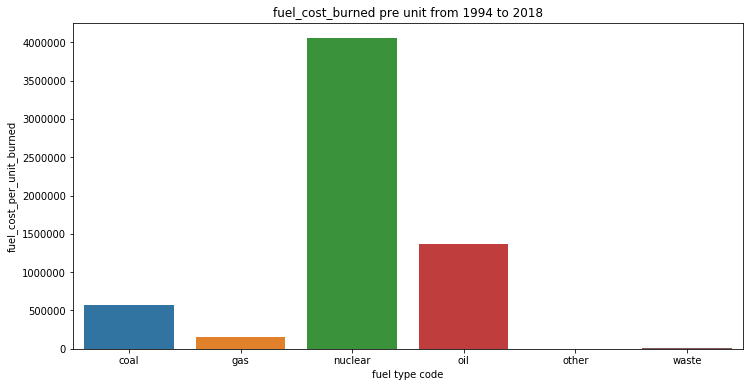

In [54]:
# to find the duel tpe with the lowest fuel cost per unit burned
plt.figure(figsize= (12,6))
fuel_cost_burned_plot = sns.barplot(data=fuel_type, x = 'fuel type code', y = 'fuel_cost_per_unit_burned')
plt.title('fuel_cost_burned pre unit from 1994 to 2018')

In [28]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [29]:
fuel_data.fuel_mmbtu_per_unit.std()

10.600220307806886

In [30]:
fuel_data.fuel_mmbtu_per_unit.quantile(0.75)

17.006

In [31]:
fuel_data.fuel_qty_burned.skew()

15.851495469109503

In [32]:
fuel_data.fuel_qty_burned.kurt()

651.3694501337732

In [34]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [36]:
fuel_data.fuel_unit.count()

29343

In [37]:
180/29343

0.006134342091810653

In [38]:
fuel_data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [40]:
#The second and third lowest correlation with the Fuel Cost Per Unit Burned are  -0.010034 and -0.018535
#which is fuel_mmbtu_per_unit and fuel_qty_burned

In [41]:
fuel_type.head()

,fuel type code,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,coal,988354,1.626898e+10,177459.483188,576254.381,9.995814e+05,15275.11517
1,gas,1425666,5.562880e+10,11737.687844,156891.829,1.389252e+05,62126.34574
2,nuclear,87851,4.462058e+09,14382.174064,4053318.428,2.340864e+07,1404.14500
3,oil,913137,5.089737e+08,46887.135739,1361824.819,2.531352e+06,102402.57762
4,other,18448,4.923388e+08,95.649646,3048.394,2.817538e+03,25899.18000


In [49]:
#grouping fuel_data into fuel type code and report year
fuel_type_year = pd.DataFrame(fuel_data.groupby(['fuel_type_code_pudl','report_year']) [['record_id','utility_id_ferc1', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 
            'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']].sum())
fuel_type_year.reset_index(['fuel_type_code_pudl','report_year'],inplace=True)
fuel_type_year

,fuel_type_code_pudl,report_year,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,coal,1994,50430,7.172082e+08,10293.429297,14984.572,59215.371,682.14697
1,coal,1995,51231,1.257398e+09,10262.019015,14571.785,13704.146,663.74149
2,coal,1996,45720,6.988514e+08,9269.878000,12694.803,12087.581,581.57661
3,coal,1997,44254,8.169024e+08,9000.095755,43742.178,11308.641,551.68662
4,coal,1998,46403,8.982095e+08,9212.781694,11902.597,308602.749,557.06574
...,...,...,...,...,...,...,...,...
143,waste,2014,2840,3.607257e+06,8.715213,591.594,545.293,343.82900
144,waste,2015,2837,3.737472e+06,8.738479,629.270,591.380,391.21400
145,waste,2016,2547,3.782403e+06,8.828807,539.079,504.245,429.59900
146,waste,2017,2183,3.534230e+06,8.686320,452.079,417.818,359311.75300


In [43]:
# % change between 1998 to 1994
# 1998 is 11902.597 is a decrease
#1994 is 14984.572
(14984.572 - 11902.597)/14984.572

0.20567654518260517

In [44]:
fuel_data.fuel_cost_per_unit_delivered.max()

7964521.0

In [45]:
fuel_data[fuel_data['fuel_cost_per_unit_delivered'] == 7964521.0]['report_year']

3564    1997
Name: report_year, dtype: int64

In [ ]:
# highest average fuel_cost_per_unit_delivered was 7964521.0 in 1997